In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
#Storing dataset in variable named data
my_data = pd.read_csv('abalone.csv')
data = pd.DataFrame(my_data)
X = data.iloc[:, :7]
y = data.iloc[:, -1]

In [20]:
# Number of random splits
num_splits = 20

# Lists to store training and test 
train_mse_list = []
test_mse_list = []


In [21]:
# Loop over 20 random splits
for _ in range(num_splits):
    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # Set random_state to an integer for reproducibility
    
    # Calculate average training response
    avg_train_response = np.mean(y_train)
    
    # Predict the average training response 
    y_pred_train = np.full_like(y_train, avg_train_response)
    y_pred_test = np.full_like(y_test, avg_train_response)
    
    # Calculate MSE 
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    # Append MSE values 
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

In [22]:
# Calculate the average training and test 
avg_train_mse = np.mean(train_mse_list)
avg_test_mse = np.mean(test_mse_list)

# Report the results
print(f"Average Training MSE for Null Model: {avg_train_mse}")
print(f"Average Test MSE for Null Model: {avg_test_mse}")


Average Training MSE for Null Model: 11.153282614821077
Average Test MSE for Null Model: 11.854864433811802


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.linalg import cholesky

In [24]:
# Data is stored in a variable named 'data' 
my_data = pd.read_csv('abalone.csv')
data = pd.DataFrame(my_data)
X = data.iloc[:, :7]
y = data.iloc[:, -1]

In [25]:
# Regularization parameter
lambda_param = 0.001

# Number of random splits
num_splits = 20

# Lists to store results 
train_r2_list = []
test_r2_list = []
train_mse_list = []
test_mse_list = []
log_det_list = []

In [26]:
# Loop over 20 random splits
for _ in range(num_splits):
    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  # Set random_state to an integer for reproducibility
    
    # Analytical OLS regression with regularization
    XTX = np.dot(X_train.T, X_train)
    reg_term = lambda_param * np.eye(X_train.shape[1])
    XTX_reg = XTX + reg_term
    
    # Calculate the Cholesky decomposition
    L = cholesky(XTX_reg, lower=True)
    
    # Cholesky decomposition
    beta = np.linalg.solve(L.T, np.linalg.solve(L, np.dot(X_train.T, y_train)))
    
    # Predictions on training and test sets
    y_pred_train = np.dot(X_train, beta)
    y_pred_test = np.dot(X_test, beta)
    
    # Calculate R2 for training and test sets
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    # Calculate the logarithm
    log_det = np.sum(2 * np.log(np.abs(np.diag(L))))
    
    # Append results to lists
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    log_det_list.append(log_det)

In [27]:
# Calculate averages and standard deviations
avg_train_r2 = np.mean(train_r2_list)
std_train_r2 = np.std(train_r2_list)
avg_test_r2 = np.mean(test_r2_list)
std_test_r2 = np.std(test_r2_list)

avg_train_mse = np.mean(train_mse_list)
std_train_mse = np.std(train_mse_list)
avg_test_mse = np.mean(test_mse_list)
std_test_mse = np.std(test_mse_list)

avg_log_det = np.mean(log_det_list)
std_log_det = np.std(log_det_list)

print(f"Average Training R2: {avg_train_r2}, Standard Deviation: {std_train_r2}")
print(f"Average Test R2: {avg_test_r2}, Standard Deviation: {std_test_r2}")
print(f"Average Training MSE: {avg_train_mse}, Standard Deviation: {std_train_mse}")
print(f"Average Test MSE: {avg_test_mse}, Standard Deviation: {std_test_mse}")
print(f"Average Log Det: {avg_log_det}, Standard Deviation: {std_log_det}")


Average Training R2: 0.5028826715157619, Standard Deviation: 1.1102230246251565e-16
Average Test R2: 0.5727074534540814, Standard Deviation: 1.1102230246251565e-16
Average Training MSE: 5.1128564089232515, Standard Deviation: 8.881784197001252e-16
Average Test MSE: 4.690982608949108, Standard Deviation: 8.881784197001252e-16
Average Log Det: 17.955076944766866, Standard Deviation: 0.0


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
#Loading the data
data = pd.read_csv('abalone.csv')
#Converting it to a DataFrame
my_data_set = pd.DataFrame(data)

X = my_data_set.iloc[:, :7]
Y = my_data_set.iloc[:, -1]


In [8]:
total_depths = range(1,8)
train_mse_scores_list = []
test_mse_scores_list = []
train_r2_scores_list = []
test_r2_scores_list = []
for tree_depth in total_depths:
 train_mse_depth = []
 test_mse_depth = []
 train_r2_depth = []
 test_r2_depth = []
 
 total_num_splits = 20
 
 for i in range(total_num_splits):
 #Splitting the datat set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
 
 #Initializing the Decision Tree Regression Model
 my_model = DecisionTreeRegressor(max_depth=tree_depth)
 
 #Training the Model
 my_model.fit(X_train,Y_train)
 
 #Predicts on Training and Testing data
 Y_train_predict = my_model.predict(X_train)
 Y_test_predict = my_model.predict(X_test)
 
 #Calculate MSE values
 train_mse = mean_squared_error(Y_train, Y_train_predict)
 test_mse = mean_squared_error(Y_test, Y_test_predict)
 
 #Calculate R2 values
 train_r2 = r2_score(Y_train, Y_train_predict)
 test_r2 = r2_score(Y_test, Y_test_predict)
 # Append MSE and R2 results to the lists for the current depth
 train_mse_depth.append(train_mse)
 test_mse_depth.append(test_mse)
 train_r2_depth.append(train_r2)
 test_r2_depth.append(test_r2)
 
 # Append the average MSE and R2 for the current depth
 train_mse_scores_list.append(np.mean(train_mse_depth))
 test_mse_scores_list.append(np.mean(test_mse_depth))
 train_r2_scores_list.append(np.mean(train_r2_depth))
 test_r2_scores_list.append(np.mean(test_r2_depth))


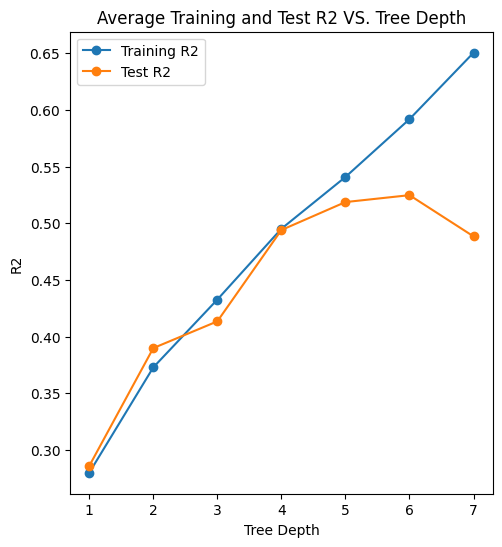

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(total_depths, train_r2_scores_list, marker='o', label='Training R2')
plt.plot(total_depths, test_r2_scores_list, marker='o', label='Test R2')
plt.xlabel('Tree Depth')
plt.ylabel('R2')
plt.title('Average Training and Test R2 VS. Tree Depth')
plt.legend()
plt.show()


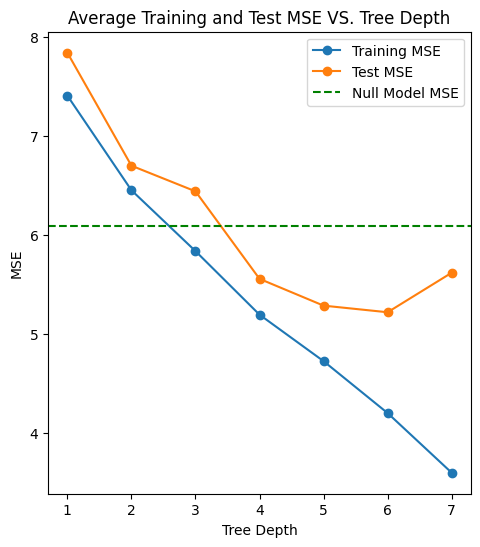

In [10]:
#Average Training and Test MSE VS. Tree Depth
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(total_depths, train_mse_scores_list, marker='o', label='Training MSE')
plt.plot(total_depths, test_mse_scores_list, marker='o', label='Test MSE')
plt.axhline(np.mean(test_mse_scores_list), color='green', linestyle='--', label='Null Model MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.title('Average Training and Test MSE VS. Tree Depth')
plt.legend()
plt.show()


In [11]:
#Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
#Loading the data
data = pd.read_csv('abalone.csv')
#Converting it to a DataFrame
my_data_set = pd.DataFrame(data)
#First 7 columns/vaiables as predictors and 8th as response
#Predictors (X) and Response (Y)
X = my_data_set.iloc[:, :7]
Y = my_data_set.iloc[:, -1]

In [ ]:

#Declaring list variables to store Training MSE and Test MSE values
#MSE and R2 score lists for every total number of trees (10, 30, 100, 300)
number_of_trees = [10, 30, 100, 300]
train_mse_scores_list = []
test_mse_scores_list = []
train_r2_scores_list = []
test_r2_scores_list = []
for n_tree in number_of_trees:
 train_mse_tree = []
 test_mse_tree = []
 train_r2_tree = []
 test_r2_tree = []
 
 total_num_splits = 20
 
 for i in range(total_num_splits):
 #Splitting the datat set into training (85%) and testing (15%)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
 
 #Initializing the Random Forest Regression Model
 my_model = RandomForestRegressor(n_estimators=n_tree, random_state=35)
 
 #Training the Model
 my_model.fit(X_train,Y_train)
 
 #Predicts on Training and Testing data
 Y_train_predict = my_model.predict(X_train)
 Y_test_predict = my_model.predict(X_test)
 
 #Calculate MSE values
 train_mse = mean_squared_error(Y_train, Y_train_predict)
 test_mse = mean_squared_error(Y_test, Y_test_predict)
 
 #Calculate R2 values
 train_r2 = r2_score(Y_train, Y_train_predict)
 test_r2 = r2_score(Y_test, Y_test_predict)
 # Append MSE and R2 results to the lists for the current number of trees
 train_mse_tree.append(train_mse)
 test_mse_tree.append(test_mse)
 train_r2_tree.append(train_r2)
 test_r2_tree.append(test_r2)
 
 # Append the average MSE and R2 for the current number of trees
 train_mse_scores_list.append(np.mean(train_mse_tree))
 test_mse_scores_list.append(np.mean(test_mse_tree))
 train_r2_scores_list.append(np.mean(train_r2_tree))
 test_r2_scores_list.append(np.mean(test_r2_tree))


In [ ]:
for i, n in enumerate(number_of_trees):
 print(f"Number of Trees: {n}")
 print(f"Average Training MSE: {train_mse_scores_list[i]}")
 print(f"Average Test MSE: {test_mse_scores_list[i]}")
 print(f"Average Training R2: {train_r2_scores_list[i]}")
 print(f"Average Test R2: {test_r2_scores_list[i]}")
 print("\n")